In [3]:
import collections

# BFS algorithm
def bfs(graph, root):

    visited, queue = set(), collections.deque([root])
    visited.add(root)

    while queue:

        # Dequeue a vertex from queue
        vertex = queue.popleft()
        print(str(vertex) + " ", end="")

        # If not visited, mark it as visited, and         # enqueue it
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)


if __name__ == '__main__':
    graph = {0: [1, 2], 1: [2], 2: [3], 3: [1, 2]}
    print("Following is Breadth First Traversal: ")
    bfs(graph, 0)


Following is Breadth First Traversal: 
0 1 2 3 

In [4]:
graph = {
    '0':['1', '2'], '1':['2'],'2':['3'],'3':['1', '2']
}
visited =set()
def dfs(visited,graph,root):
    if root not in visited:
       print(root)
       visited.add(root)
       for neighbour in graph[root]:
          dfs(visited,graph,neighbour)
dfs(visited,graph,'0')


0
1
2
3


In [5]:
Graph_nodes = {
    'A': [('B', 6), ('F', 3)],
    'B': [('C', 3), ('D', 2)],
    'C': [('D', 1), ('E', 5)],
    'D': [('C', 1), ('E', 8)],
    'E': [('I', 5), ('J', 5)],
    'F': [('G', 1),('H', 7)] ,
    'G': [('I', 3)],
    'H': [('I', 2)],
    'I': [('E', 5), ('J', 3)],
     
}

def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None
        
def h(n):
        H_dist = {
            'A': 10,
            'B': 8,
            'C': 5,
            'D': 7,
            'E': 3,
            'F': 6,
            'G': 5,
            'H': 3,
            'I': 1,
            'J': 0             
        }
        return H_dist[n]
        
def aStarAlgo(start_node, stop_node):
         
        open_set = set(start_node) 
        closed_set = set()
        g = {} 
        parents = {}
        g[start_node] = 0
        parents[start_node] = start_node
        
        while len(open_set) > 0:
            n = None

            for v in open_set:
                if n == None or g[v] + h(v) < g[n] + h(n):
                    n = v
     
            if n == stop_node or Graph_nodes[n] == None:
                pass
            else:
                for (m, weight) in get_neighbors(n):
                    if m not in open_set and m not in closed_set:
                        open_set.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                         
                    else:
                        if g[m] > g[n] + weight:
                            g[m] = g[n] + weight
                            parents[m] = n
                            if m in closed_set:
                                closed_set.remove(m)
                                open_set.add(m)
 
            if n == None:
                print('Path does not exist!')
                return None
            if n == stop_node:
                path = []
 
                while parents[n] != n:
                    path.append(n)
                    n = parents[n]
 
                path.append(start_node)
 
                path.reverse()
 
                print('Path found: {}'.format(path))
                return path
            open_set.remove(n)
            closed_set.add(n)
 
        print('Path does not exist!')
        return None

aStarAlgo('A', 'J')


Path found: ['A', 'F', 'G', 'I', 'J']


['A', 'F', 'G', 'I', 'J']

In [9]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
#from sklearn.neighbours import KNeighboursClassifier
from sklearn import datasets 
iris=datasets.load_iris() 
print("Iris Data Set Loaded...") 
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.1) 
for i in range(len (iris.target_names)): 
    print("label",i,"-",str(iris.target_names[i])) 
classifier=KNeighborsClassifier(n_neighbors=3) 
classifier.fit(x_train,y_train) 
y_pred=classifier.predict(x_test) 
print("results of classification using k-nn with k=3") 
for r in range(0,len(x_test)): 
    print("sample:",str(x_test[r]),"Actuallabel:",str(y_test[r]),"predicted-label:",str(y_pred[r])) 
    print("classification Accuracy:",classifier.score(x_test,y_test))

Iris Data Set Loaded...
label 0 - setosa
label 1 - versicolor
label 2 - virginica
results of classification using k-nn with k=3
sample: [5.9 3.  5.1 1.8] Actuallabel: 2 predicted-label: 2
classification Accuracy: 0.9333333333333333
sample: [5.2 3.4 1.4 0.2] Actuallabel: 0 predicted-label: 0
classification Accuracy: 0.9333333333333333
sample: [4.6 3.4 1.4 0.3] Actuallabel: 0 predicted-label: 0
classification Accuracy: 0.9333333333333333
sample: [5.3 3.7 1.5 0.2] Actuallabel: 0 predicted-label: 0
classification Accuracy: 0.9333333333333333
sample: [5.4 3.9 1.3 0.4] Actuallabel: 0 predicted-label: 0
classification Accuracy: 0.9333333333333333
sample: [5.  2.  3.5 1. ] Actuallabel: 1 predicted-label: 1
classification Accuracy: 0.9333333333333333
sample: [5.4 3.  4.5 1.5] Actuallabel: 1 predicted-label: 1
classification Accuracy: 0.9333333333333333
sample: [6.5 3.  5.2 2. ] Actuallabel: 2 predicted-label: 2
classification Accuracy: 0.9333333333333333
sample: [6.5 3.2 5.1 2. ] Actual

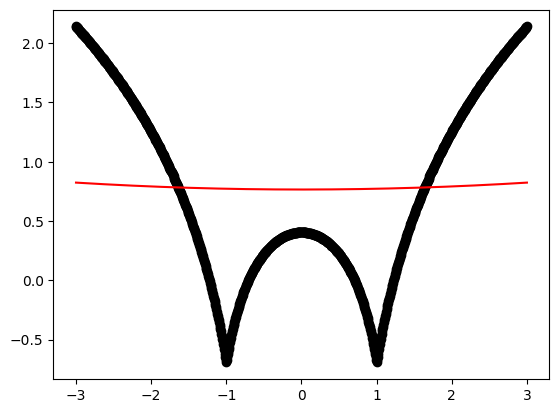

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
def local_regression(x0,X,Y,tau): 
 x0=[1,x0] 
 X=[[1,i] for i in X] 
 X=np.asarray(X) 
 xw=(X.T)*np.exp(np.sum((X-x0)**2,axis=1)/(-2*tau**2)) 
 beta=np.linalg.pinv(xw @X) @xw @Y 
 beta=beta@x0 
 return beta 
def draw(tau): 
 prediction=[local_regression(x0,X,Y,tau) for x0 in domain] 
 plt.plot(X,Y,'o',color='black') 
 plt.plot(domain,prediction,color='red') 
 plt.show() 
X=np.linspace(-3,3,num=1000) 
domain=X 
Y=np.log(np.abs(X ** 2-1)+.5)
draw(10)

In [12]:
import numpy as np 
x = np.array(([2,9],[1,5],[3,6]),dtype=float) 
y = np.array(([92],[86],[89]),dtype=float) 
x = x/np.amax(x,axis=0) 
y = y/100
#Sigmoid Curve
def sigmoid (x): 
 return 1/(1+np.exp(-x)) 
#Derivative of sigmoid function
def derivatives_sigmoid(x): 
 return x*(1-x) 
#Variable initialization
epoch = 5000
lr = 0.1
inputlayer_neurons = 2
hiddenlayer_neurons = 3
output_neurons = 1
wh = np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons)) 
bh = np.random.uniform(size=(1,hiddenlayer_neurons)) 
wout = np.random.uniform(size=(hiddenlayer_neurons,output_neurons)) 
bout = np.random.uniform(size=(1,output_neurons)) 
#draws a random range of numbers uniformly of dim x*y
for i in range (epoch): 
#forward propogation
 hinp1 = np.dot(x,wh) 
 hinp = hinp1 + bh 
 hlayer_act = sigmoid(hinp) 
 outinp1 = np.dot(hlayer_act,wout) 
 outinp = outinp1 + bout 
 output = sigmoid(outinp) 
#Backpropogation
 EO = y - output 
 outgrad = derivatives_sigmoid(output) 
 d_output = EO * output 
 EH = d_output.dot (wout.T) 
#how much hidden layer wts contributed to error
 hiddengrad = derivatives_sigmoid(hlayer_act) 
 d_hiddenlayer = EH * hiddengrad 
#dotproduct of nextLayererror and currentLayerop
 wout += hlayer_act.T.dot(d_output) * lr 
 wh += x.T.dot(d_hiddenlayer) * lr 
print("Input: \n" + str(x)) 
print("Actual Output: \n" + str(y)) 
print("Predictd Output: \n" ,output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predictd Output: 
 [[0.90149022]
 [0.87586875]
 [0.89512499]]


In [ ]:
import pandas as pd 
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder 
from sklearn.naive_bayes import GaussianNB 
# Load Data from CSV
data = pd.read_csv('/content/tennisdata.csv') 
print("The first 5 Values of data is :\n", data.head()) 
# obtain train data and train output
X = data.iloc[:, :-1] 
print("\nThe First 5 values of the train data is\n", X.head()) 
y = data.iloc[:, -1] 
print("\nThe First 5 values of train output is\n", y.head()) 
# convert them in numbers
le_outlook = LabelEncoder() 
X.Outlook = le_outlook.fit_transform(X.Outlook) 
le_Temperature = LabelEncoder() 
X.Temperature = le_Temperature.fit_transform(X.Temperature) 
le_Humidity = LabelEncoder() 
X.Humidity = le_Humidity.fit_transform(X.Humidity) 
le_Windy = LabelEncoder() 
X.Windy = le_Windy.fit_transform(X.Windy) 
print("\nNow the Train output is\n", X.head()) 
le_PlayTennis = LabelEncoder() 
y = le_PlayTennis.fit_transform(y) 
print("\nNow the Train output is\n",y) 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 
0.20) 
classifier = GaussianNB() 
classifier.fit(X_train, y_train) 
from sklearn.metrics import accuracy_score 
print("Accuracy is:", accuracy_score(classifier.predict(X_test), 
y_test))

In [ ]:
import csv 
with open("trainingexamples.csv") as f: 
 csv_file = csv.reader(f) 
 data = list(csv_file) 
 specific = data[1][:-1] 
 general = [['?' for i in range(len(specific))] for j in
range(len(specific))] 
 for i in data: 
 if i[-1] == "Yes": 
 for j in range(len(specific)): 
 if i[j] != specific[j]: 
 specific[j] = "?"
 general[j][j] = "?"
 elif i[-1] == "No": 
 for j in range(len(specific)): 
 if i[j] != specific[j]: 
 general[j][j] = specific[j] 
 else: 
 general[j][j] = "?"
 print("\nStep " + str(data.index(i)+1) + " of Candidate Elimination Algorithm") 
 print(specific) 
 print(general) 
 gh = [] # gh = general Hypothesis
 for i in general: 
 for j in i: 
 if j != '?': 
 gh.append(i) 
 break
 print("\nFinal Specific hypothesis:\n", specific) 
 print("\nFinal General hypothesis:\n", gh) 